# Plotting with Seaborn

> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

In [9]:
#import seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Categorical Plots
How many continents are in 'df_can'?

In [4]:
df_can = pd.read_csv('Canada.csv')

In [5]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

### countplot
**A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.**
Let's find the count of Continents in the data 'df_can' using countplot on 'Continent'

<Axes: xlabel='Continent', ylabel='count'>

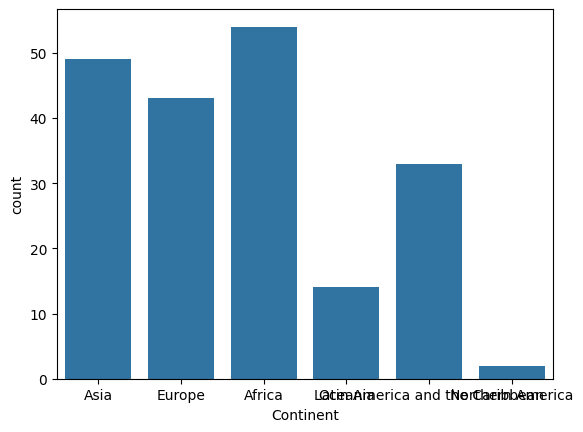

In [6]:
sns.countplot(x='Continent', data=df_can)

The labels on the x-axis doesnot look as expected.
Let's try to replace the 'Latin America and the Caribbean' with and "L-America", 'Northern America' with "N-America", and change the figure size and then display the plot again

In [7]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

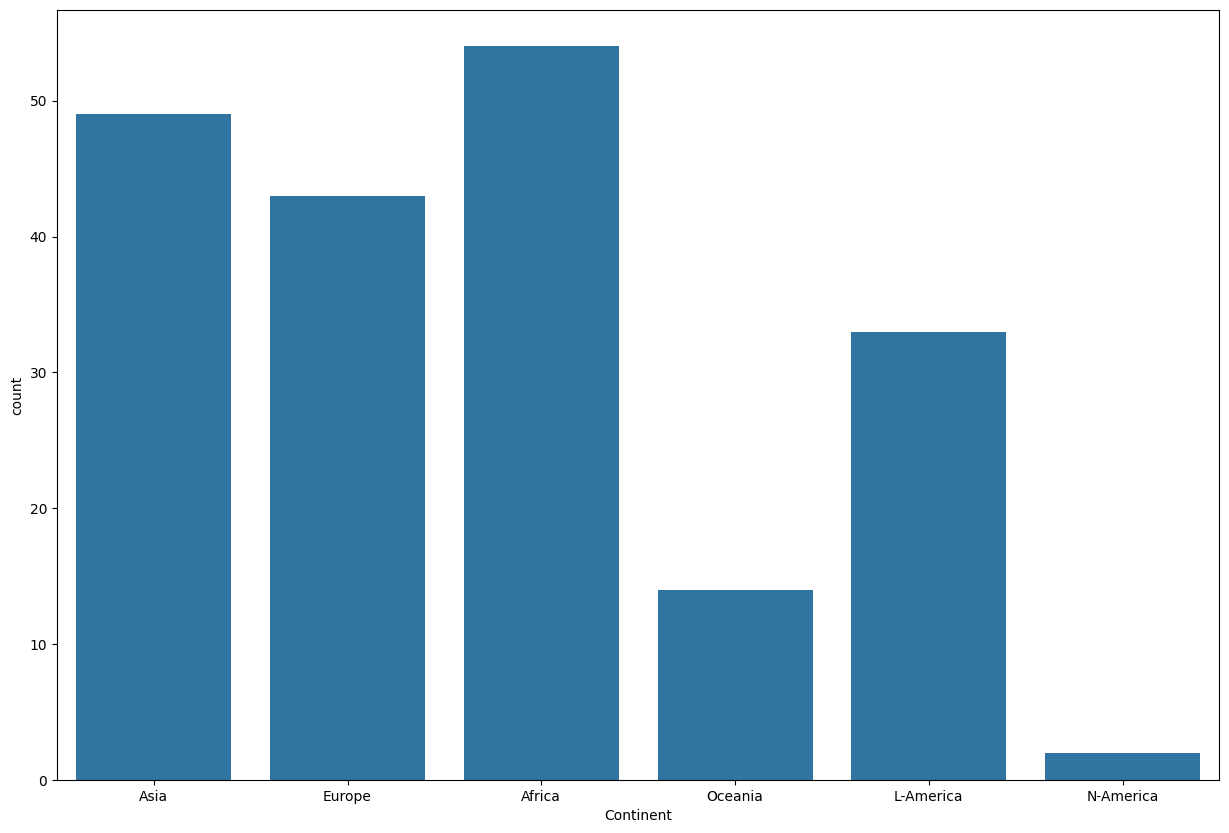

In [10]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Continent', data=df_can1)

### Barplot
**This plot will perform the Groupby on a categorical varaible and plot aggregated values, with confidence intervals**.<br> Let's plot the total immigrants Continent-wise

<Axes: xlabel='Continent', ylabel='Total'>

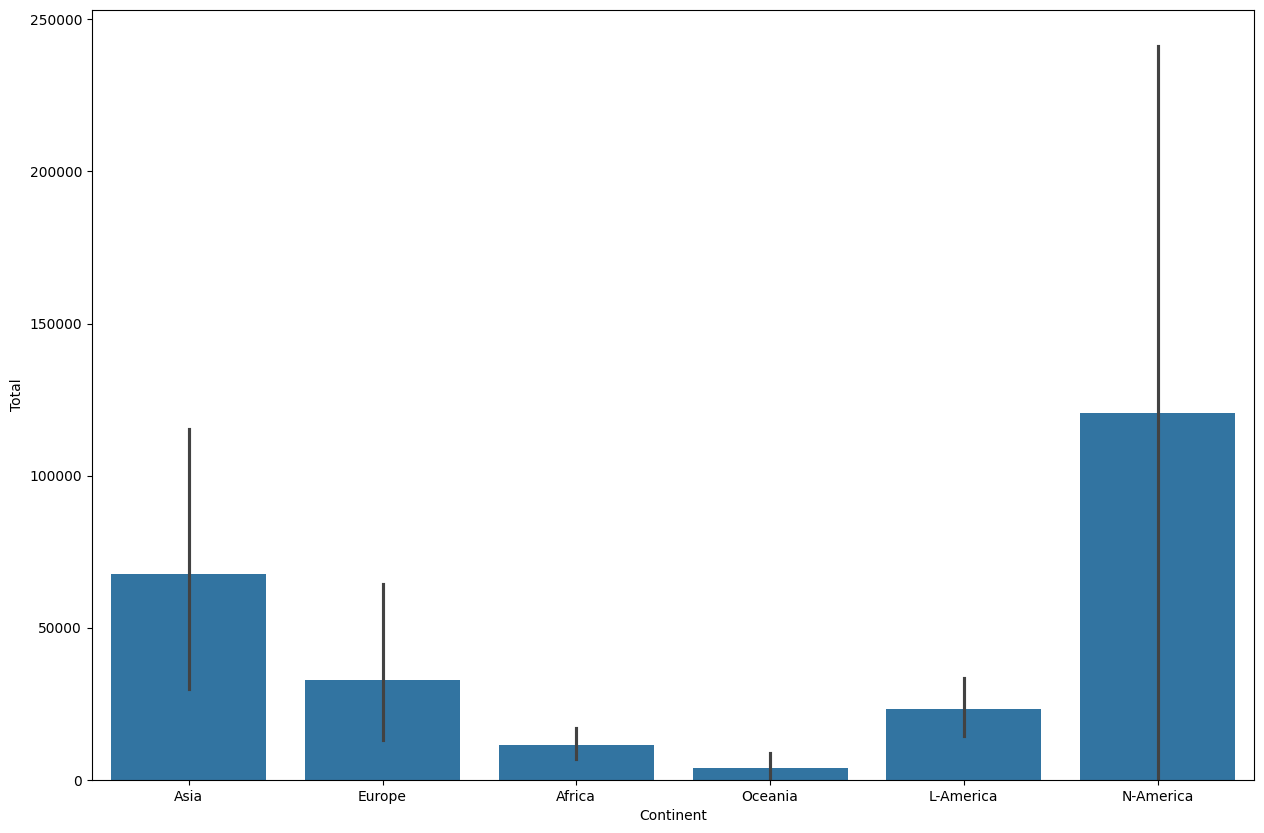

In [11]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Continent', y='Total', data=df_can1)

You can verify the values by performing the groupby on the Total and Continent for mean()

In [12]:
df_Can2=df_can1.groupby('Continent')['Total'].mean()
df_Can2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

# Regression Plot <a id="6"></a>
With *seaborn*, generating a regression plot is as simple as calling the **regplot** function.

In [13]:
years = list(map(str, range(1980, 2014)))
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

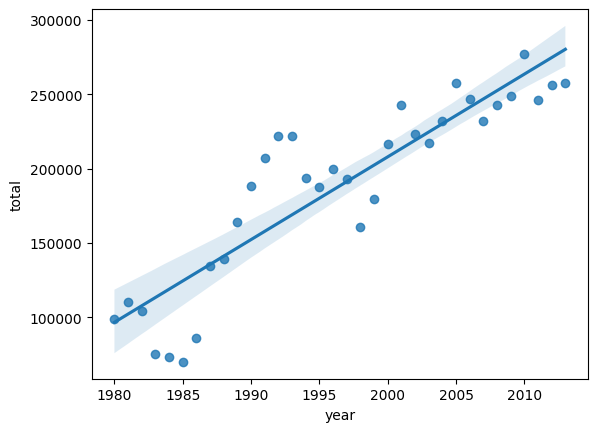

In [14]:
#seaborn is already imported at the start of this lab
sns.regplot(x='year', y='total', data=df_tot)

Customize the color of the scatter plot and regression line to green.

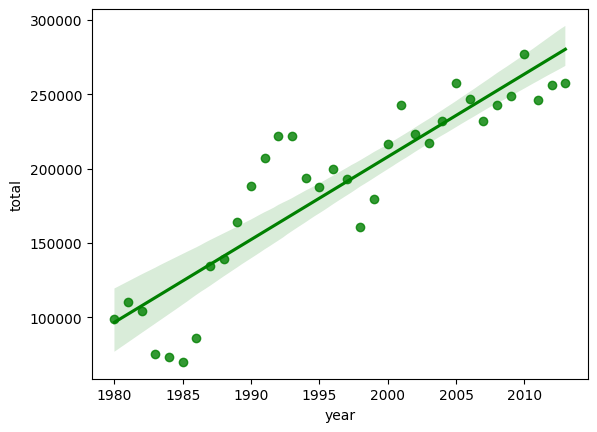

In [15]:
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

Change markers to `+`

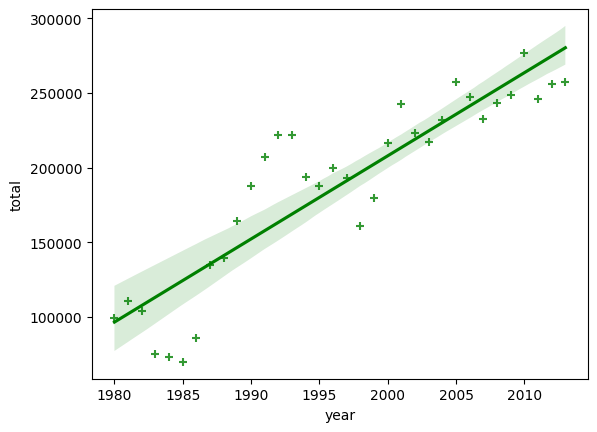

In [16]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

Blow up the plot to its more asthetically pleasing

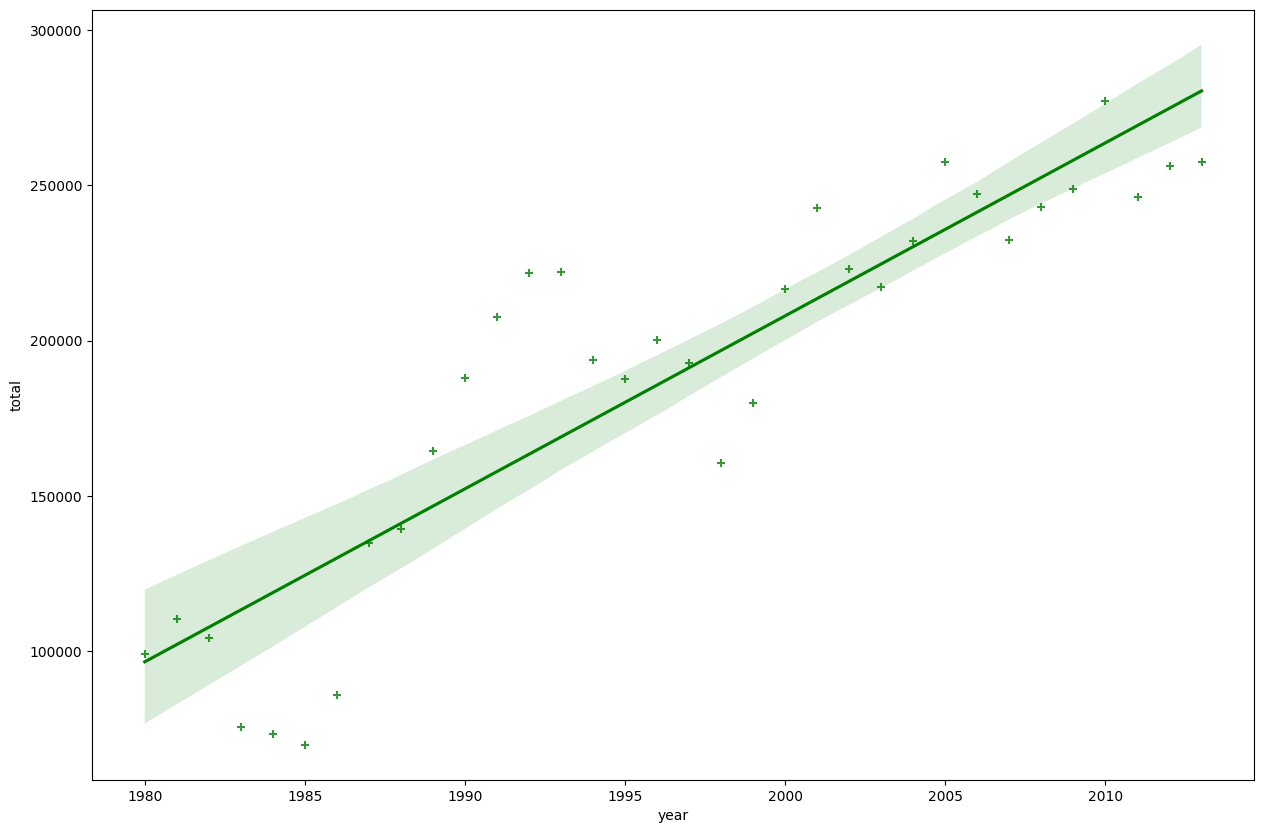

In [17]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

Increase the size of the markers and add titles to the axes

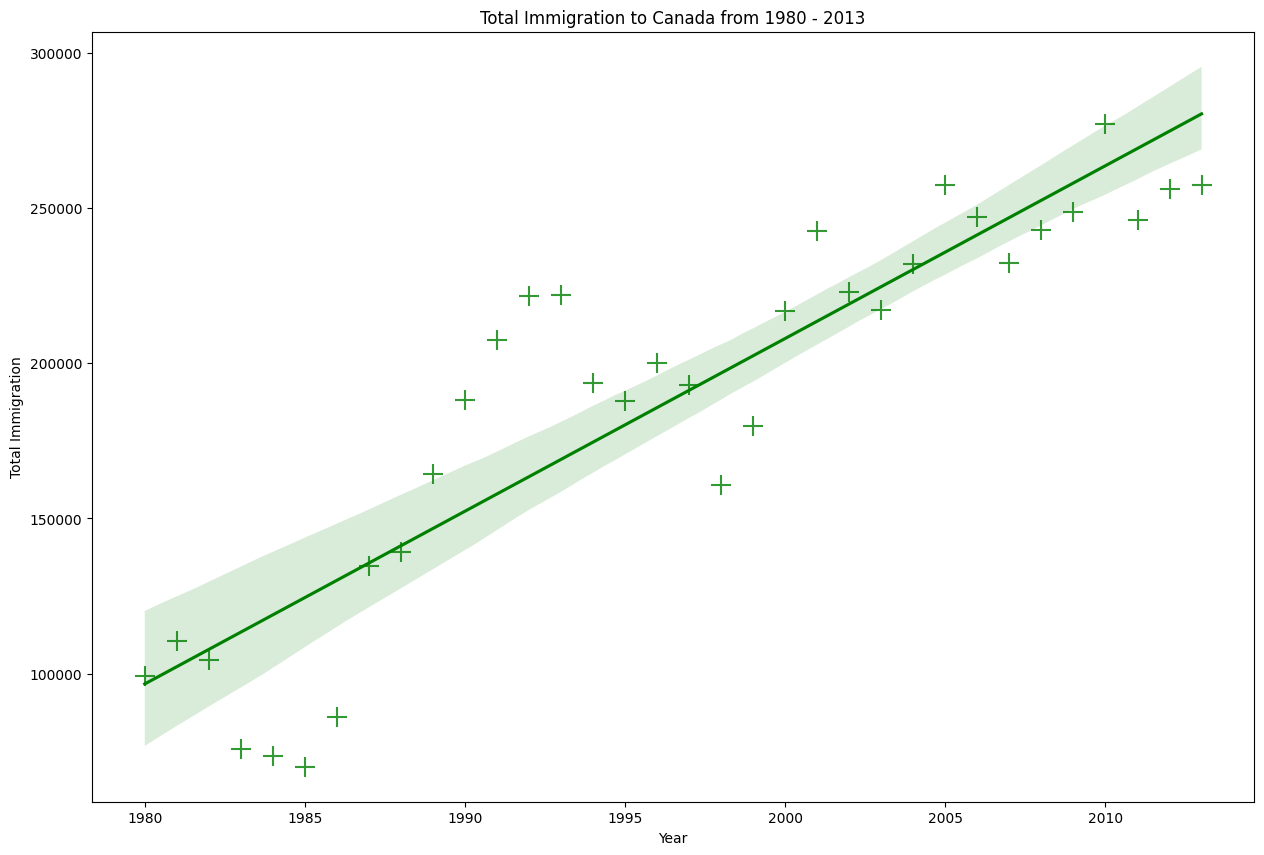

In [18]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

Increase font size of tickmark labels, title, and x- and y-labels

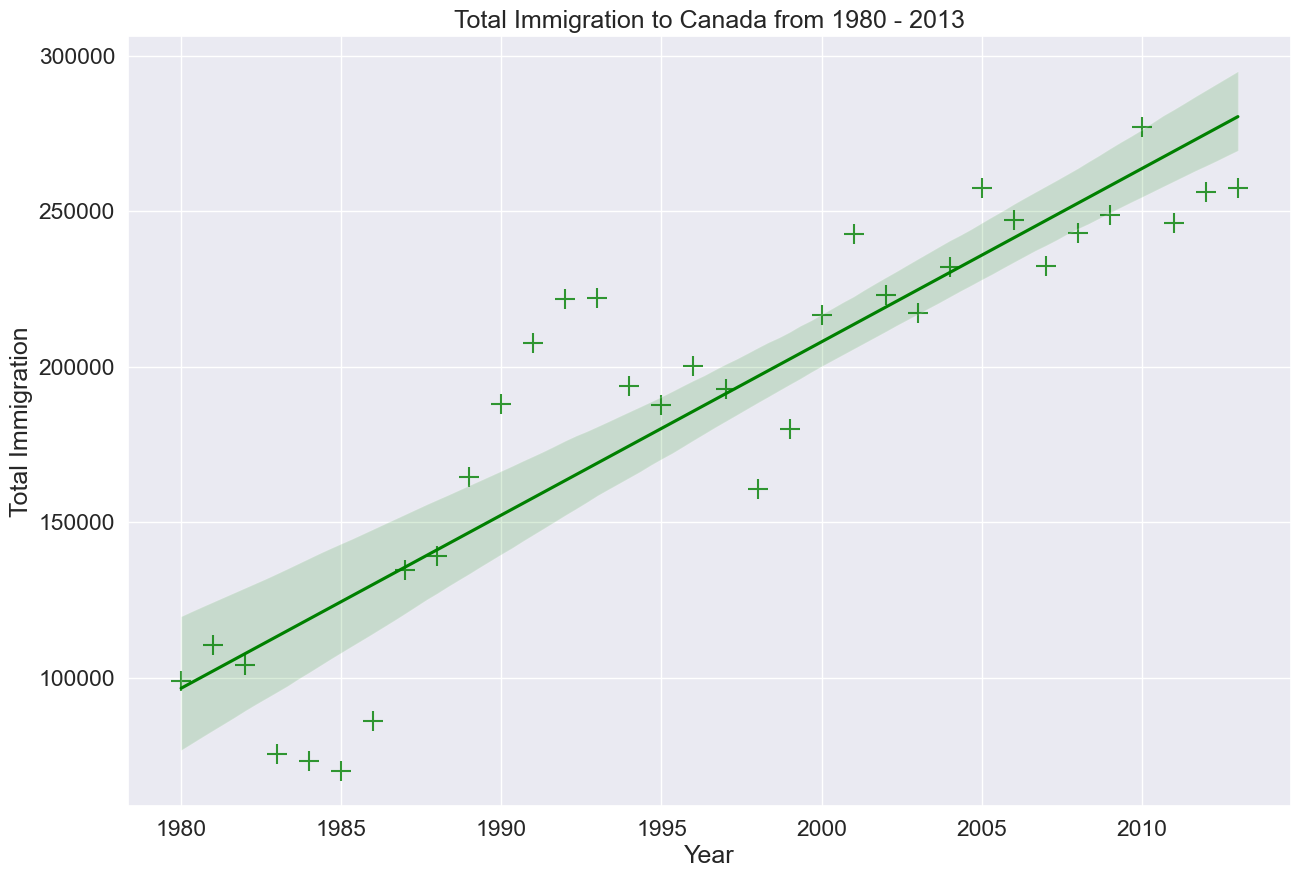

In [19]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Complete scatter plot with regression fit with only 5 lines of code.

Change the background

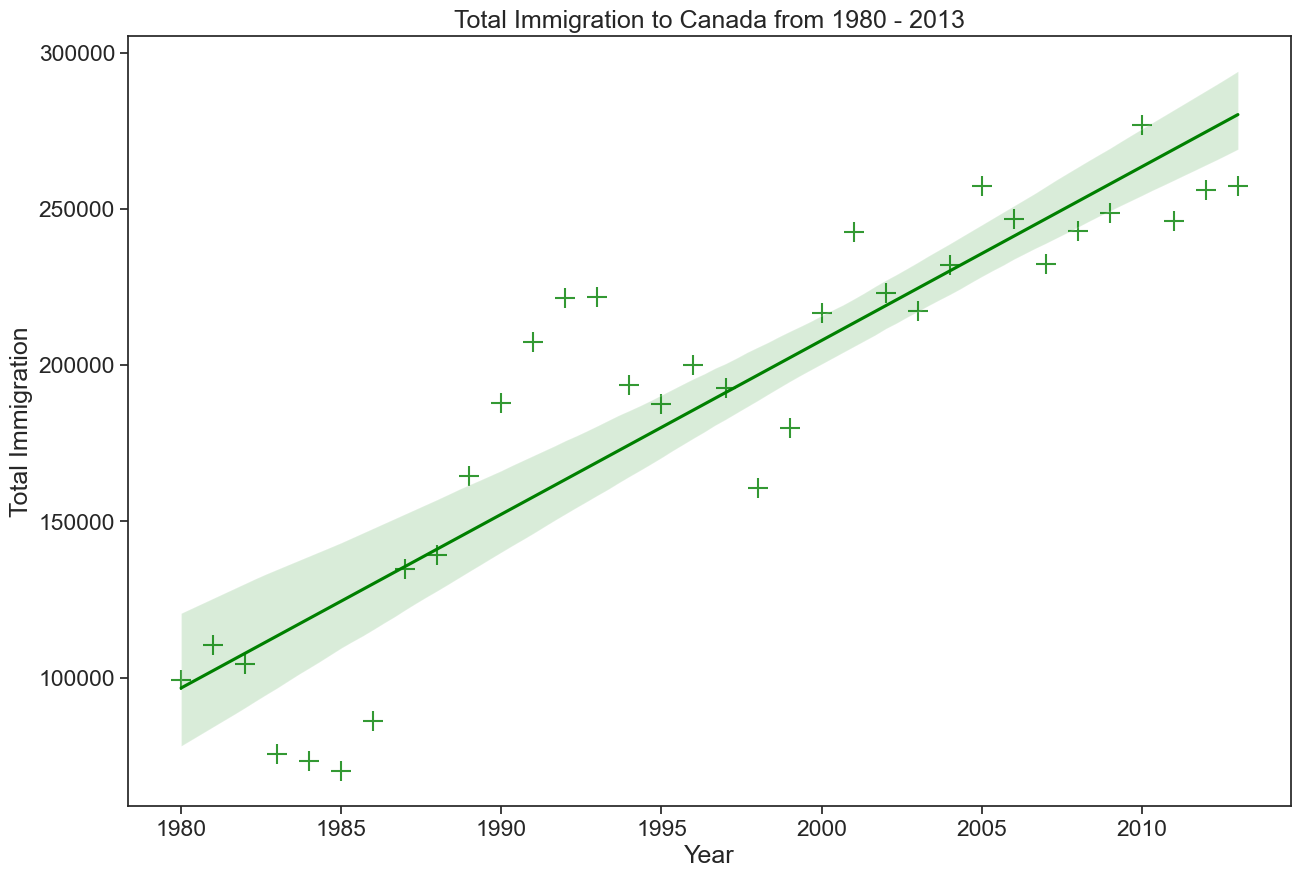

In [20]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Add gridlines

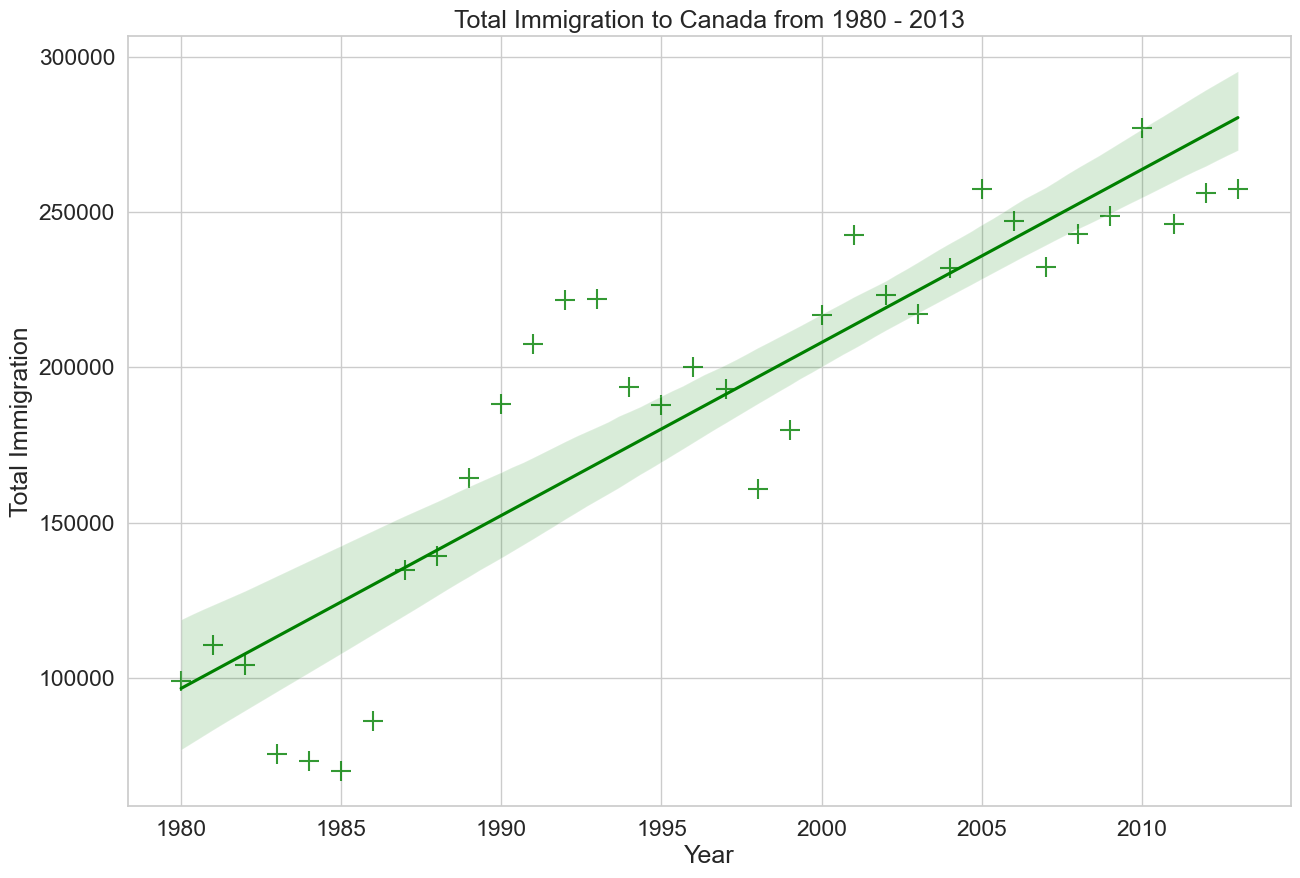

In [21]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

**Question**: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

In [23]:
#set country as index
df_can.set_index('Country', inplace=True)

df_dsn = df_can.loc[['Denmark', 'Sweden', 'Norway'],:]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327


In [24]:
years = list(map(str, range(1980, 2014)))

#get total population per year in df_dsn
df_dsn_tot = pd.DataFrame(df_dsn[years].sum(axis=0))

#change years to type float for regression 
df_dsn_tot.index = map(float, df_dsn_tot.index)

# reset the index to put in back in as a column in the df_dsn_tot dataframe
df_dsn_tot.reset_index(inplace=True)

# rename columns
df_dsn_tot.columns = ['year', 'total']

#view the datframe
df_dsn_tot.head()


,year,total
0,1980.0,669
1,1981.0,678
2,1982.0,627
3,1983.0,333
4,1984.0,252


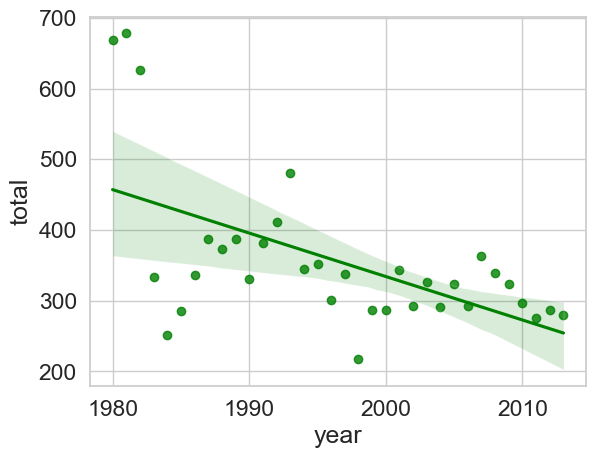

In [25]:
#plot
sns.regplot(x='year', y='total', data=df_dsn_tot, color='green')

plt.show()

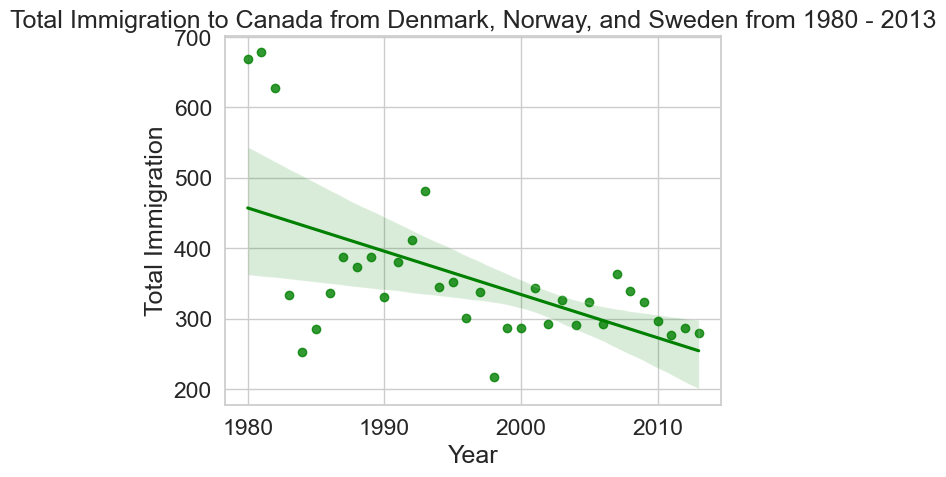

In [26]:
# add labels
ax = sns.regplot(x='year', y='total', data=df_dsn_tot, color='green')
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from Denmark, Norway, and Sweden from 1980 - 2013')

plt.show()